In [ ]:
"""
1. Các bước xây dựng mô hình Deep Learning với Tensorflow và Keras:
Bước 1: Chuẩn bị dữ liệu
Bước 2: Xây dựng mô hình
Bước 3: Huấn luyện mô hình
Bước 4: Đánh giá mô hình
Bước 5: Dự đoán
"""

In [ ]:
"""
2. Dropout là gì?
Dropout là một kỹ thuật giúp giảm overfitting trong quá trình huấn luyện mô hình.
overfitting là hiện tượng mô hình học tập quá mức trên tập huấn luyện, nhưng lại không thể khái quát được trên tập kiểm tra.
"""

In [ ]:
"""
3. Trình bày các hiểu biết của bạn về các khái niệm với keras code cụ thể:
epoch: một epoch là một vòng lặp qua toàn bộ tập dữ liệu huấn luyện. Thay đổi epoch có thể làm tăng độ chính xác của mô hình.
batch_size: số lượng mẫu dữ liệu được sử dụng để cập nhật các tham số trong mô hình. Thay đổi batch_size có thể làm tăng độ chính xác của mô hình.
optimizer: thuật toán tối ưu hàm mất mát. 
loss: hàm mất mát.
metrics: đánh giá mô hình. 
dropout: kỹ thuật giúp giảm overfitting trong quá trình huấn luyện mô hình.
dense: lớp kết nối đầy đủ. 
"""

In [41]:
"""
4. Case study: Diabetes
a. Machine Learning
"""
# load data
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
df = pd.read_csv('./diabetes.csv')
df.info()
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183 

In [36]:
# ---check for null values---
print("Nulls")
print("=====")
print(df.isnull().sum())

Nulls
=====
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [37]:
# ---check for 0s---
print("0s")
print("==")
print(df.eq(0).sum())

0s
==
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [38]:
df[['Glucose','BloodPressure','SkinThickness',
 'Insulin','BMI','DiabetesPedigreeFunction','Age']] = \
 df[['Glucose','BloodPressure','SkinThickness',
 'Insulin','BMI','DiabetesPedigreeFunction','Age']].replace
(0,np.NaN)

(0, nan)

In [39]:
df.fillna(df.mean(), inplace = True) # replace NaN with the mean
print(df.eq(0).sum())

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


C:\Users\anhdu\AppData\Local\Temp\ipykernel_10464\1499135588.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace = True) # replace NaN with the mean


                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

C:\Users\anhdu\AppData\Local\Temp\ipykernel_10464\2039642856.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(df.columns)


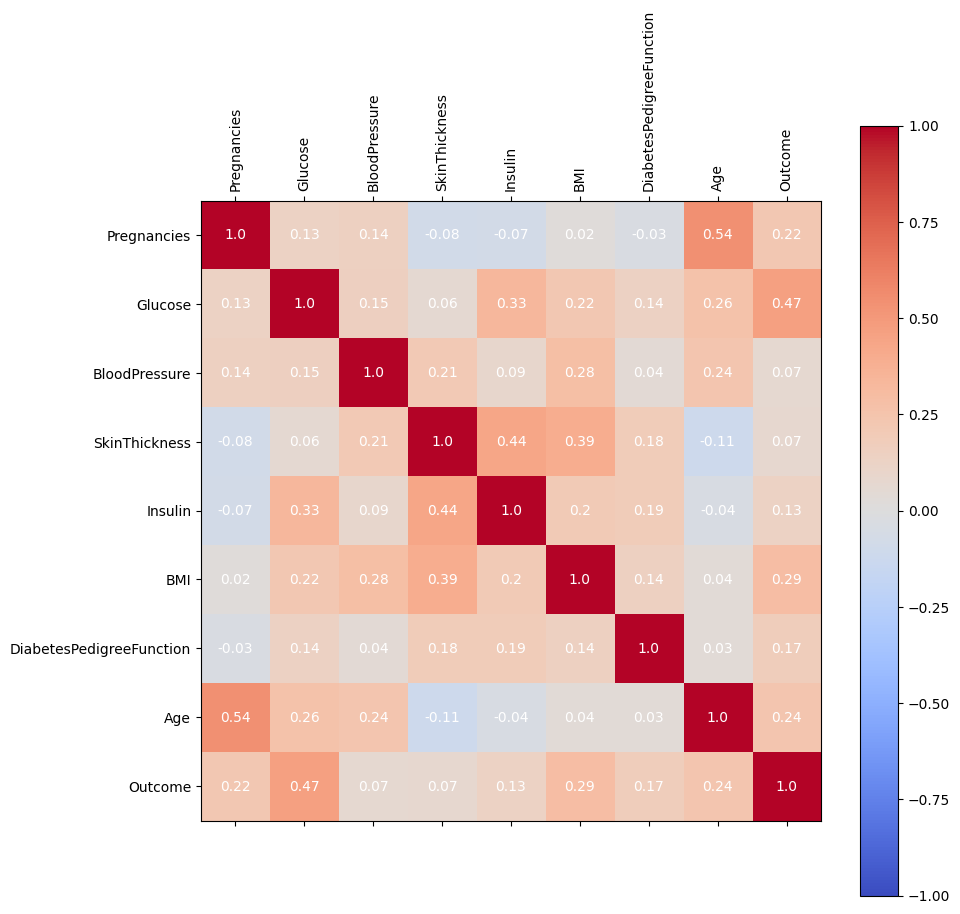

Index(['Outcome', 'Glucose', 'BMI', 'Age'], dtype='object')
[1.         0.4665814  0.29269466 0.23835598]


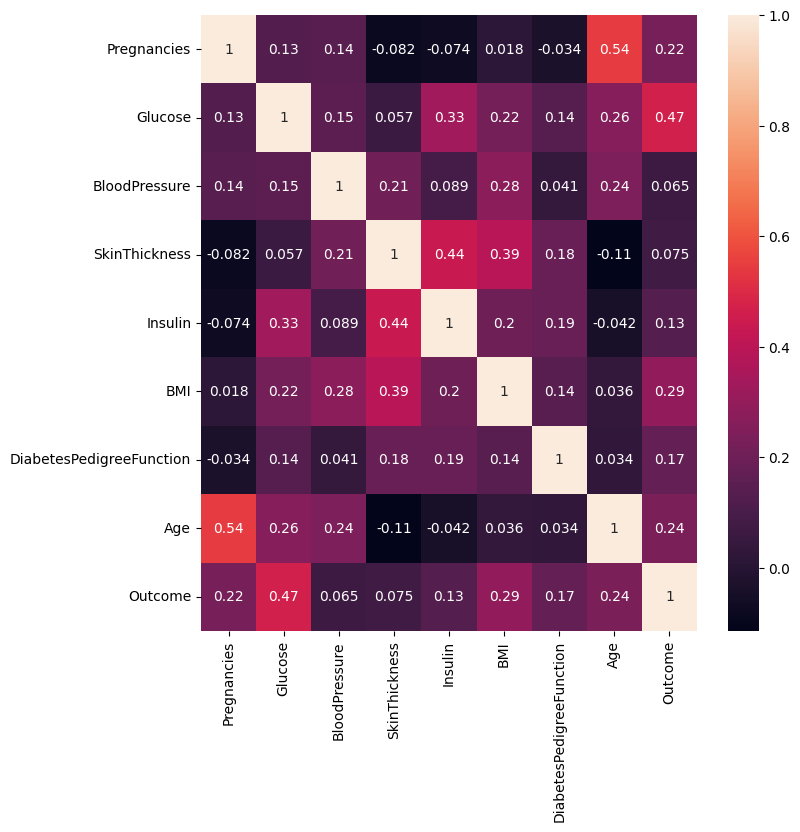

In [100]:
corr = df.corr()
print(corr)

fig, ax = plt.subplots(figsize=(10, 10))
cax = ax.matshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, len(df.columns), 1)
ax.set_xticks(ticks)
ax.set_xticklabels(df.columns)
plt.xticks(rotation=90)
ax.set_yticklabels(df.columns)
ax.set_yticks(ticks)
# ---print the correlation factor---
for i in range(df.shape[1]):
    for j in range(9):
        text = ax.text(j, i, round(corr.iloc[i][j], 2), ha="center", va="center", color="w")
plt.show()


import seaborn as sns
sns.heatmap(df.corr(),annot=True)
#---get a reference to the current figure and set its size---
fig = plt.gcf()
fig.set_size_inches(8,8)
#---get the top four features that has the highest correlation---
print(df.corr().nlargest(4, 'Outcome').index)
#---print the top 4 correlation values---
print(df.corr().nlargest(4, 'Outcome').values[:,8])

In [98]:
# Logistics Regression
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
#---features---
X = df[['Glucose','BMI','Age']]
#---label---
y = df.iloc[:,8]
log_regress = linear_model.LogisticRegression()
log_regress_score = cross_val_score(log_regress, X, y, cv=10,
scoring='accuracy').mean()
print(log_regress_score)
result = {}
result.update({'Logistic Regression':log_regress_score})

# K-Nearest Neighbors
# ---empty list that will hold cv (cross-validates) scores---
cv_scores = []  # ---number of folds---
folds = 10
# ---creating odd list of K for KNN---
ks = list(range(1, int(len(X) * ((folds - 1)/folds)), 2))
# ---perform k-fold cross validation---
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=folds, scoring='accuracy').mean()
    cv_scores.append(score)
# ---get the maximum score---
knn_score = max(cv_scores)
# ---find the optimal k that gives the highest score---
optimal_k = ks[cv_scores.index(knn_score)]
print(f"The optimal number of neighbors is {optimal_k}")
print(knn_score)
result.update({'K-Nearest Neighbors':knn_score})

# Support Vector Machines
from sklearn import svm
linear_svm = svm.SVC(kernel='linear')
linear_svm_score = cross_val_score(linear_svm, X, y,
 cv=10, scoring='accuracy').mean()
print(linear_svm_score)
result.update({'Support Vector Machines':linear_svm_score})

rbf = svm.SVC(kernel='rbf')
rbf_score = cross_val_score(rbf, X, y, cv=10, scoring='accuracy').mean()
print(rbf_score)
result.update({'Support Vector Machines':rbf_score})

0.765704032809296
The optimal number of neighbors is 19
0.7669514695830485
0.7630724538619276
0.7617908407382091
{'Logistic Regression': 0.765704032809296, 'K-Nearest Neighbors': 0.7669514695830485, 'Support Vector Machines': 0.7617908407382091}


In [99]:
print(result)

{'Logistic Regression': 0.765704032809296, 'K-Nearest Neighbors': 0.7669514695830485, 'Support Vector Machines': 0.7617908407382091}


In [102]:
# split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(614, 3) (154, 3) (614,) (154,)


In [1]:
"""
b. Deep Learning
"""
# ---load data---
import pandas as pd
df = pd.read_csv('./diabetes.csv')


In [2]:
# ---features---
X = df.iloc[:,0:8]
# X = df[['Glucose','BMI','Age']]
# ---label---
y = df.iloc[:,8]
# ---split the data into train and test and validate---
# ---train: 60%, test: 20%, validate: 20%---
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=0)
# ---build the model---
import keras
from keras.models import Sequential
from keras.layers import Dense
# Tạo model Sequential 
model = Sequential()
# Thêm 1 lớp Dense với 16 nơ ron, 8 đầu vào, activation='relu' cho đầu ra không âm 0 đến max(đầu vào)
model.add(Dense(16, input_dim=8, activation='relu'))
# Thêm 1 lớp Dense với 8 nơ ron, activation='relu' cho đầu ra không âm 0 đến max(đầu vào)
model.add(Dense(8, activation='relu'))
# Thêm 1 lớp Dense với 1 nơ ron, activation='sigmoid' cho đầu ra 0 đến 1
model.add(Dense(1, activation='sigmoid'))
# ---compile the model---

# loss: hàm mất mát, optimizer: thuật toán tối ưu giảm thiểu loss, metrics: đánh giá

# binary_crossentropy là hàm mất mát cho bài toán phân loại 2 lớp (0,1)
# adam là thuật toán tối ưu
# accuracy là đánh giá
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print (model.summary())


# Đánh giá kết quả dự đoán…độ chính xác….accuracy_score
# ---train the model---
model.fit(X_train, y_train, epochs=200, batch_size=10, validation_data=(X_val, y_val))


# # ---predict the test set---
# y_pred = model.predict(X_test)
# y_pred = (y_pred > 0.5)
# # print(y_pred)


# # evaluate the model
# from sklearn.metrics import accuracy_score
# print(accuracy_score(y_test, y_pred))

# Vẽ biểu đồ thể hiện độ chính xác của mô hình
import matplotlib.pyplot as plt
print(model.history.history.keys())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                144       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/200
46/46 [==============================] - 6s 18ms/step - loss: 3.1488 - accuracy: 0.5391 - val_loss: 0.8279 - val_accuracy: 0.7468
Epoch 2/200
46/46 [==============================] - 0s 8ms/step - loss: 1.1911 - accuracy: 0.6261 - val_loss: 0.7054 - val_accuracy: 0.7338
Epoch 3/200
46/46 [===============

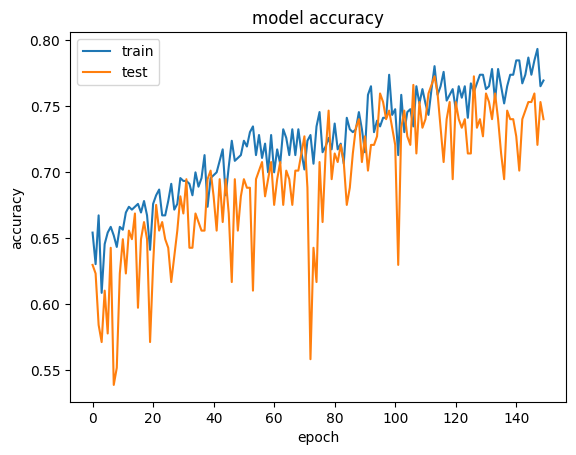

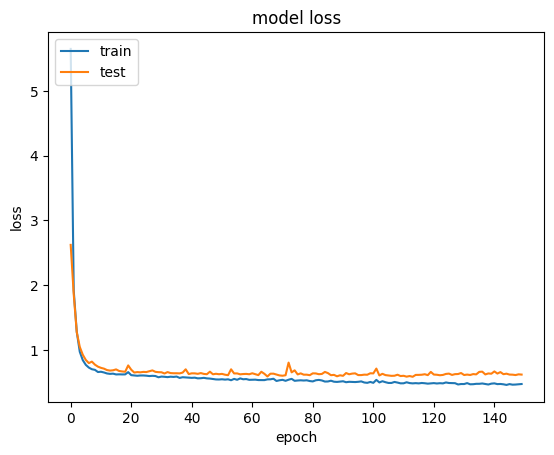

In [54]:
#7. Giải thích Biểu đồ
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
#8. Giải thích biểu đồ
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [56]:
# evaluate the model
from sklearn.metrics import accuracy_score
# ---predict the test set---
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
# print(y_pred)

print(accuracy_score(y_test, y_pred))
print(model.evaluate(X_test, y_test))

5/5 [==============================] - 0s 2ms/step
0.7597402597402597
5/5 [==============================] - 0s 5ms/step - loss: 0.5269 - accuracy: 0.7597
[0.5268608927726746, 0.7597402334213257]


In [72]:
# ma trận nhầm lẫn
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[75 25]
 [39 15]]


In [51]:
# độ chính xác
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.6948051948051948


In [52]:
# evaluate the model
print(model.evaluate(X_test, y_test))
print(model.metrics_names)
#print 10 predictions
pred = model.predict(X_test)
pred[:10]

5/5 [==============================] - 0s 2ms/step - loss: 0.6447 - accuracy: 0.7013
[0.6447318196296692, 0.701298713684082]
['loss', 'accuracy']
5/5 [==============================] - 0s 2ms/step


array([[0.4056434 ],
       [0.00093868],
       [0.690842  ],
       [0.23642024],
       [0.22046985],
       [0.20196962],
       [0.5174769 ],
       [0.69660723],
       [0.16994698],
       [0.13180731]], dtype=float32)

In [27]:
# Cải thiện mô hình bằng cách thay đổi các tham số
from keras.layers import Dropout
model = Sequential()
# Thêm đầu vào lên 8
model.add(Dense(16, input_dim=8, activation='relu'))
# Add drop out tiêu thụ 10% dữ liệu
model.add(Dropout(0.1))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print (model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 16)                144       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_22 (Dense)            (None, 8)                 136       
                                                                 
 dropout_3 (Dropout)         (None, 8)                 0         
                                                                 
 dense_23 (Dense)            (None, 1)                 9         
                                                                 
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________
None


In [28]:
# Train model
import pandas as pd
df = pd.read_csv('./diabetes.csv')
# ---features---
X = df.iloc[:,0:8]
# ---label---
y = df.iloc[:,8]
# ---split the data into train and test and validate---
# ---train: 60%, test: 20%, validate: 20%---
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

In [37]:
model.fit(X_train, y_train, epochs=150, batch_size=10, validation_data=(X_val, y_val))

Epoch 1/150
46/46 [==============================] - 0s 8ms/step - loss: 0.5212 - accuracy: 0.7522 - val_loss: 0.7835 - val_accuracy: 0.7468
Epoch 2/150
46/46 [==============================] - 0s 6ms/step - loss: 0.5328 - accuracy: 0.7457 - val_loss: 0.7556 - val_accuracy: 0.7468
Epoch 3/150
46/46 [==============================] - 0s 5ms/step - loss: 0.5207 - accuracy: 0.7630 - val_loss: 0.7664 - val_accuracy: 0.7403
Epoch 4/150
46/46 [==============================] - 0s 6ms/step - loss: 0.5384 - accuracy: 0.7348 - val_loss: 0.7760 - val_accuracy: 0.7468
Epoch 5/150
46/46 [==============================] - 0s 7ms/step - loss: 0.5523 - accuracy: 0.7435 - val_loss: 0.7442 - val_accuracy: 0.7597
Epoch 6/150
46/46 [==============================] - 0s 5ms/step - loss: 0.5176 - accuracy: 0.7543 - val_loss: 0.7509 - val_accuracy: 0.7532
Epoch 7/150
46/46 [==============================] - 0s 5ms/step - loss: 0.5131 - accuracy: 0.7739 - val_loss: 0.7616 - val_accuracy: 0.7338
Epoch 8/150
4

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


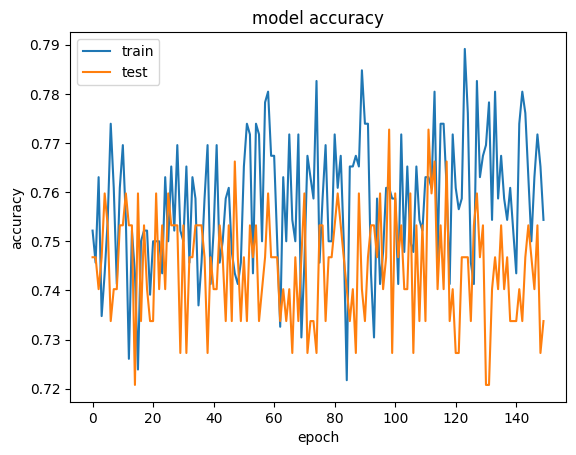

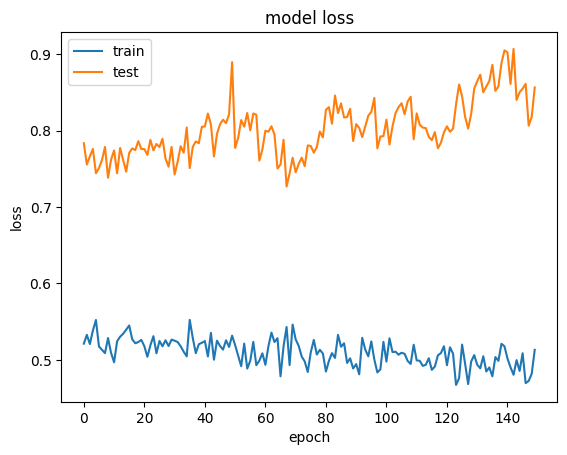

In [39]:
# Vẽ biêu đồ thể hiện độ chính xác của mô hình
import matplotlib.pyplot as plt
print(model.history.history.keys())
#7. Giải thích Biểu đồ
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
#8. Giải thích biểu đồ
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [40]:
# Đánh giá kết quả dự đoán…độ chính xác….accuracy_score
# ---predict the test set---
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
# print(y_pred)
# evaluate the model
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

5/5 [==============================] - 0s 2ms/step
0.6948051948051948


In [41]:
# evaluate the model
print(model.evaluate(X_test, y_test))
print(model.metrics_names)
#print 10 predictions
pred = model.predict(X_test)
pred[:10]

5/5 [==============================] - 0s 3ms/step - loss: 0.5478 - accuracy: 0.6948
[0.5477756857872009, 0.6948052048683167]
['loss', 'accuracy']
5/5 [==============================] - 0s 2ms/step


array([[0.19069257],
       [0.00740935],
       [0.39613092],
       [0.30238396],
       [0.19966477],
       [0.06496786],
       [0.35930863],
       [0.47858727],
       [0.29444125],
       [0.19966477]], dtype=float32)

In [ ]:
# So sánh, đánh giá kết quả dự đoán deep learning và các kỹ thuật cớ bản
""" 
Các kỹ thuật cơ bản:
    Logistic Regression: 0.765704032809296
    K-Nearest Neighbors: 0.7669514695830485
    Support Vector Machines: 0.7617908407382091
Deep learning:
Model chưa cải thiện: 
    y_test với y_pred = 0.7662337422370911
    evaluate the model = [0.47162118554115295, 0.7662337422370911]
                            ['loss', 'accuracy']

Model đã cải thiện: 
    y_test với y_pred = 0.6818181818181818
    evaluate the model = [0.5849032998085022, 0.6818181872367859]
                            ['loss', 'accuracy']
"""

In [42]:
# Cải thiện mô hình bằng cách thay đổi các tham số
from keras.layers import Dropout, Dense
from keras.models import Sequential
model = Sequential()
# Thêm đầu vào lên 8
model.add(Dense(16, input_dim=8, activation='relu'))
# Add drop out tiêu thụ 10% dữ liệu
# model.add(Dropout(0.1))
model.add(Dense(8, activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(4, activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print (model.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 16)                144       
                                                                 
 dense_25 (Dense)            (None, 8)                 136       
                                                                 
 dense_26 (Dense)            (None, 4)                 36        
                                                                 
 dense_27 (Dense)            (None, 1)                 5         
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
None


In [43]:
# Train model
import pandas as pd
df = pd.read_csv('./diabetes.csv')
# ---features---
X = df.iloc[:,0:8]
# ---label---
y = df.iloc[:,8]
# ---split the data into train and test and validate---
# ---train: 60%, test: 20%, validate: 20%---
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

In [44]:
model.fit(X_train, y_train, epochs=250, batch_size=10, validation_data=(X_val, y_val))

Epoch 1/250
46/46 [==============================] - 1s 10ms/step - loss: 0.8203 - accuracy: 0.6413 - val_loss: 0.6584 - val_accuracy: 0.6818
Epoch 2/250
46/46 [==============================] - 0s 5ms/step - loss: 0.6679 - accuracy: 0.6413 - val_loss: 0.6470 - val_accuracy: 0.6818
Epoch 3/250
46/46 [==============================] - 0s 5ms/step - loss: 0.6616 - accuracy: 0.6413 - val_loss: 0.6500 - val_accuracy: 0.6818
Epoch 4/250
46/46 [==============================] - 0s 5ms/step - loss: 0.6560 - accuracy: 0.6413 - val_loss: 0.6578 - val_accuracy: 0.6818
Epoch 5/250
46/46 [==============================] - 0s 5ms/step - loss: 0.6535 - accuracy: 0.6413 - val_loss: 0.6440 - val_accuracy: 0.6818
Epoch 6/250
46/46 [==============================] - 0s 5ms/step - loss: 0.6476 - accuracy: 0.6413 - val_loss: 0.6417 - val_accuracy: 0.6818
Epoch 7/250
46/46 [==============================] - 0s 5ms/step - loss: 0.6443 - accuracy: 0.6413 - val_loss: 0.6472 - val_accuracy: 0.6818
Epoch 8/250


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


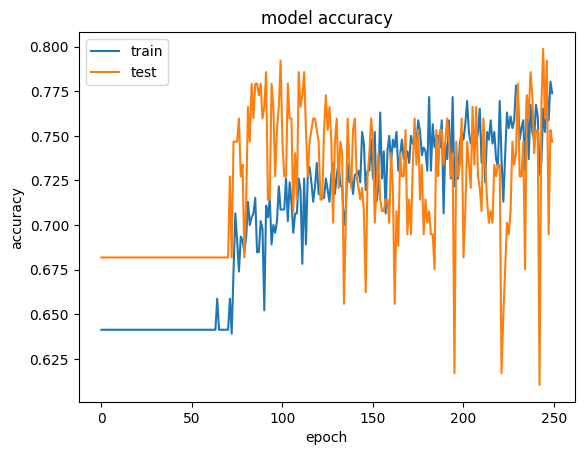

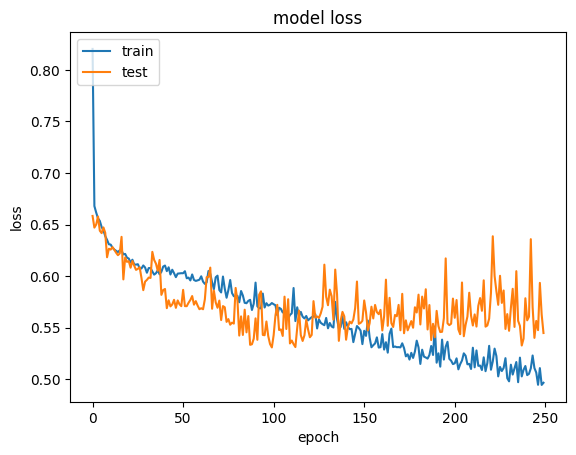

In [45]:
# Vẽ biêu đồ thể hiện độ chính xác của mô hình
import matplotlib.pyplot as plt
print(model.history.history.keys())
#7. Giải thích Biểu đồ
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
#8. Giải thích biểu đồ
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [46]:
# evaluate the model
print(model.evaluate(X_test, y_test))
print(model.metrics_names)

5/5 [==============================] - 0s 6ms/step - loss: 0.6098 - accuracy: 0.7338
[0.6098474264144897, 0.7337662577629089]
['loss', 'accuracy']


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 64)                576       
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_29 (Dense)            (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_30 (Dense)            (None, 16)                528       
                                                                 
 dropout_6 (Dropout)         (None, 16)                0         
                                                                 
 dense_31 (Dense)            (None, 1)                

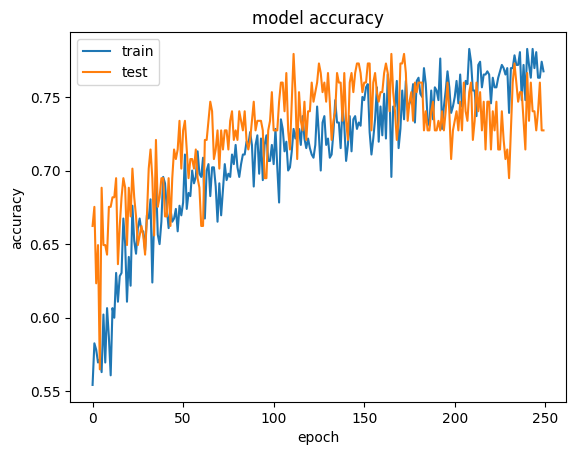

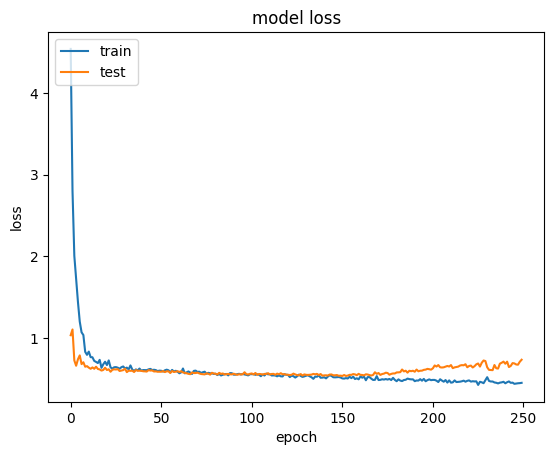

5/5 [==============================] - 0s 5ms/step - loss: 0.6447 - accuracy: 0.7013
[0.6447318196296692, 0.701298713684082]
['loss', 'accuracy']


In [47]:
# Dropout đi 0.1
# Cải thiện mô hình bằng cách thay đổi các tham số
from keras.layers import Dropout, Dense
from keras.models import Sequential
model = Sequential()
# Thêm đầu vào lên 8
model.add(Dense(64, input_dim=8, activation='relu'))
# Add drop out tiêu thụ 10% dữ liệu
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print (model.summary())
# Train model
import pandas as pd
df = pd.read_csv('./diabetes.csv')
# ---features---
X = df.iloc[:,0:8]
# ---label---
y = df.iloc[:,8]
# ---split the data into train and test and validate---
# ---train: 60%, test: 20%, validate: 20%---
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=0)
model.fit(X_train, y_train, epochs=250, batch_size=10, validation_data=(X_val, y_val))
# Vẽ biêu đồ thể hiện độ chính xác của mô hình
import matplotlib.pyplot as plt
print(model.history.history.keys())
#7. Giải thích Biểu đồ
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
#8. Giải thích biểu đồ
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# evaluate the model
print(model.evaluate(X_test, y_test))
print(model.metrics_names)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 64)                576       
                                                                 
 dropout_18 (Dropout)        (None, 64)                0         
                                                                 
 dense_29 (Dense)            (None, 32)                2080      
                                                                 
 dropout_19 (Dropout)        (None, 32)                0         
                                                                 
 dense_30 (Dense)            (None, 16)                528       
                                                                 
 dropout_20 (Dropout)        (None, 16)                0         
                                                                 
 dense_31 (Dense)            (None, 1)                

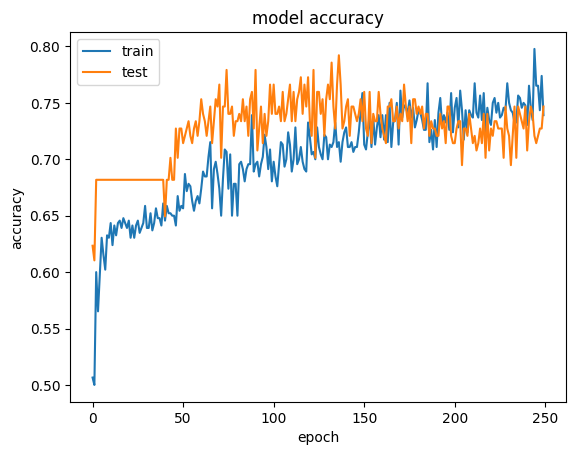

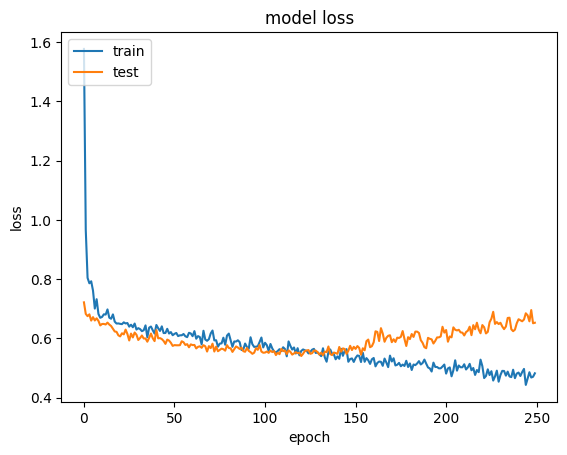

5/5 [==============================] - 0s 3ms/step - loss: 0.6078 - accuracy: 0.6948
[0.607822060585022, 0.6948052048683167]
['loss', 'accuracy']


In [14]:
# Dropout đi 0.2
# Cải thiện mô hình bằng cách thay đổi các tham số
from keras.layers import Dropout, Dense
from keras.models import Sequential
model = Sequential()
# Thêm đầu vào lên 8
model.add(Dense(64, input_dim=8, activation='relu'))
# Add drop out tiêu thụ 20% dữ liệu
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print (model.summary())
# Train model
import pandas as pd
df = pd.read_csv('./diabetes.csv')
# ---features---
X = df.iloc[:,0:8]
# ---label---
y = df.iloc[:,8]
# ---split the data into train and test and validate---
# ---train: 60%, test: 20%, validate: 20%---
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=0)
model.fit(X_train, y_train, epochs=250, batch_size=10, validation_data=(X_val, y_val))
# Vẽ biêu đồ thể hiện độ chính xác của mô hình
import matplotlib.pyplot as plt
print(model.history.history.keys())
#7. Giải thích Biểu đồ
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
#8. Giải thích biểu đồ
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# evaluate the model
print(model.evaluate(X_test, y_test))
print(model.metrics_names)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 64)                576       
                                                                 
 dropout_24 (Dropout)        (None, 64)                0         
                                                                 
 dense_37 (Dense)            (None, 32)                2080      
                                                                 
 dropout_25 (Dropout)        (None, 32)                0         
                                                                 
 dense_38 (Dense)            (None, 16)                528       
                                                                 
 dropout_26 (Dropout)        (None, 16)                0         
                                                                 
 dense_39 (Dense)            (None, 1)                

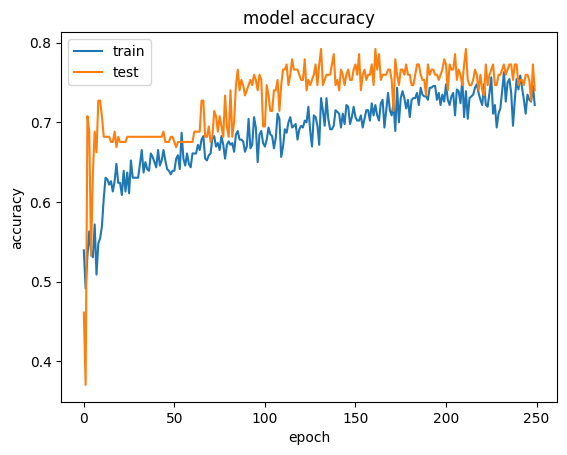

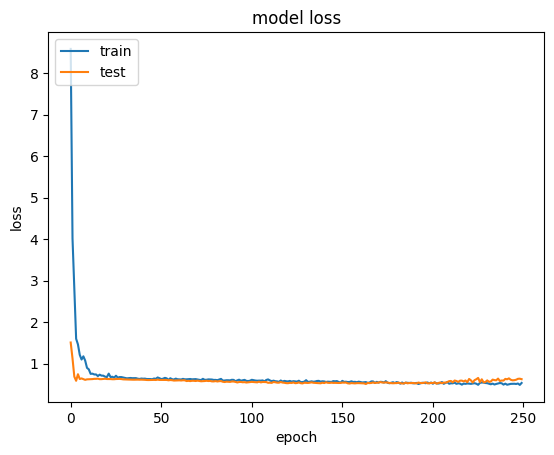

5/5 [==============================] - 0s 4ms/step - loss: 0.5898 - accuracy: 0.7013
[0.589824914932251, 0.701298713684082]
['loss', 'accuracy']


In [16]:
# Dropout đi 0.1
# Cải thiện mô hình bằng cách thay đổi các tham số
from keras.layers import Dropout, Dense
from keras.models import Sequential
model = Sequential()
# Thêm đầu vào lên 8
model.add(Dense(64, input_dim=8, activation='relu'))
# Add drop out tiêu thụ 10% dữ liệu
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print (model.summary())
# Train model
import pandas as pd
df = pd.read_csv('./diabetes.csv')
# ---features---
X = df.iloc[:,0:8]
# ---label---
y = df.iloc[:,8]
# ---split the data into train and test and validate---
# ---train: 60%, test: 20%, validate: 20%---
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=0)
model.fit(X_train, y_train, epochs=250, batch_size=10, validation_data=(X_val, y_val))
# Vẽ biêu đồ thể hiện độ chính xác của mô hình
import matplotlib.pyplot as plt
print(model.history.history.keys())
#7. Giải thích Biểu đồ
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
#8. Giải thích biểu đồ
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# evaluate the model
print(model.evaluate(X_test, y_test))
print(model.metrics_names)